# Visualização de dados em Python com Matplotlib 

**1. Introdução**
- Matplotlib é provavelmente o pacote Python mais utilizado para gráficos 2D. Ele fornece uma maneira muito rápida de visualizar dados de Python e números de qualidade de publicação em vários formatos. 
- O Matplotlib vem com um conjunto de configurações padrão que permitem personalizar todos os tipos de propriedades. Você pode controlar os padrões de quase todas as propriedades em matplotlib: tamanho de figura e dpi, largura de linha, cor e estilo, eixos, propriedades de eixo e grade, texto e propriedades de fonte e assim por diante. Enquanto os padrões de matplotlib são bastante bons na maioria dos casos, você pode querer modificar algumas propriedades para casos específicos.

**Exemplo 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X,C)
plt.plot(X,S)

plt.show()

**Alterando as cores e as larguras de linha, legenda:**
- Primeiro passo, queremos ter o cosseno em azul eo seno em vermelho e uma linha ligeiramente mais grossa para ambos. Também alteraremos ligeiramente o tamanho da figura para torná-lo mais horizontal.
- Vamos adicionar uma legenda no canto superior esquerdo. Isso só requer a adição do rótulo de argumento de palavra-chave (que será usado na caixa de legenda) para os comandos de plotagem.

In [2]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")
plt.legend(loc='upper left', frameon=False)
plt.show()

Para ajustar os tamanhos das fontes

In [3]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [4]:
plt.figure(figsize=(10,6), dpi=80)
plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosseno")
plt.plot(X, S, color="red",  linewidth=2.5, linestyle="-", label="seno")
plt.legend(loc='upper left', frameon=False)

plt.show()

**2. Carregar e examinar o conjunto de dados**
- Vamos começar. A função mostrada na célula abaixo carrega os dados do arquivo .csv. Uma limpeza mínima é realizada nos dados. As linhas com valores em falta são eliminadas e algumas colunas são convertidas a partir de cadeias contendo números para dados numéricos utilizando-se do Pandas.

In [2]:
def read_auto_data(fileName = "Automobile price data.csv"):
    'Function to load the auto price data set from a .csv file' 
    import pandas as pd
    import numpy as np

    ## Read the .csv file with the pandas read_csv method
    auto_prices = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
#    auto_prices[cols] = auto_prices[cols].as_type(int64)
        
    return auto_prices
auto_prices = read_auto_data()


In [3]:
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


- Você pode ver que há tipos de variáveis ​​numéricas e de string (categóricas). 
- Como uma próxima etapa examine algumas estatísticas de resumo das colunas numéricas usando o método Pandas descrever.
- Note que as unidades de medida são americanas e não métricas.

In [4]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


**2.1- Tipos de gráficos básicos**
- Agora que nós carregamos e tivemos um primeiro olhar para os dados, vamos começar a trabalhar fazendo alguns gráficos.
- Existem tipos de gráfico enumeráveis que são usados para a exploração de dados.

Nesta disciplina focaremos nos seguintes tipos de gráficos:
a) Gráfico de dispersão
b) Gráficos em Linha
c) Gráficos em Barras
d) Histogramas
e) BoxPlot
f) BoxPlot usando  Densidade do Kernel
g) ViolinPlot

** a) Gráficos de dispersão**
- Os gráficos de dispersão mostram a relação entre duas variáveis sob a forma de pontos no gráfico. Em termos simples, os valores ao longo de um eixo horizontal são plotados contra um eixo vertical.
- O pacote Pandas contém um número de métodos de plotagem úteis que operam em dataframes. A receita simples para traçar a partir de um dataframe Pandas 
- Use o método de plotagem, especificando o argumento de tipo ou use um método de plotagem gráfico-específico.
- Especifique as colunas com os valores para os eixos x e y.

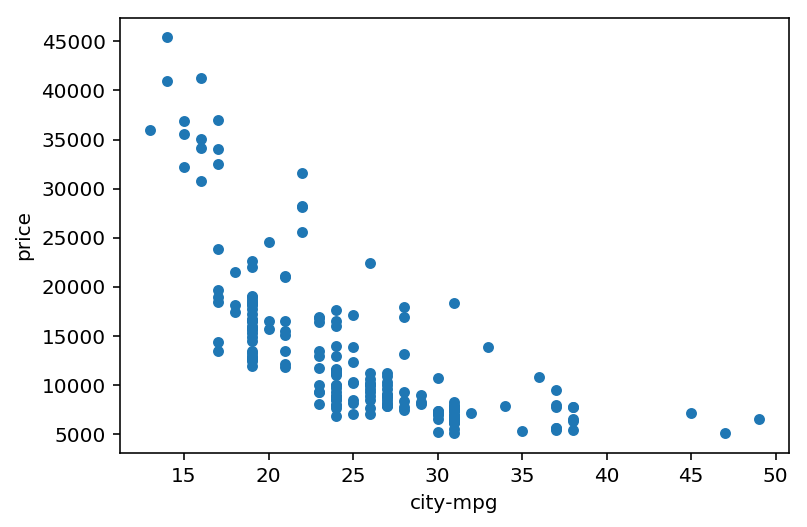

In [5]:
%matplotlib inline 
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price')

- Nossa receita básica funcionou, mas não nos dá muito controle sobre o resultado.
- Aproveitamos o fato de que os métodos Pandas plot são construídos em matplotlib. Assim, podemos especificar uma figura e um ou mais eixos dentro dessa figura. Podemos controlar muitos atributos do plot  uma vez especificados os eixos. Nossa receita melhorada se parece com isto:

**- Especifique uma figura, incluindo um tamanho.**

**- Defina um ou mais eixos dentro da figura.**

**- Use o método de escolha de panda. Certifique-se de especificar o eixo que você está usando.**

**Use métodos nos eixos para controlar atributos como títulos e rótulos de eixo.**

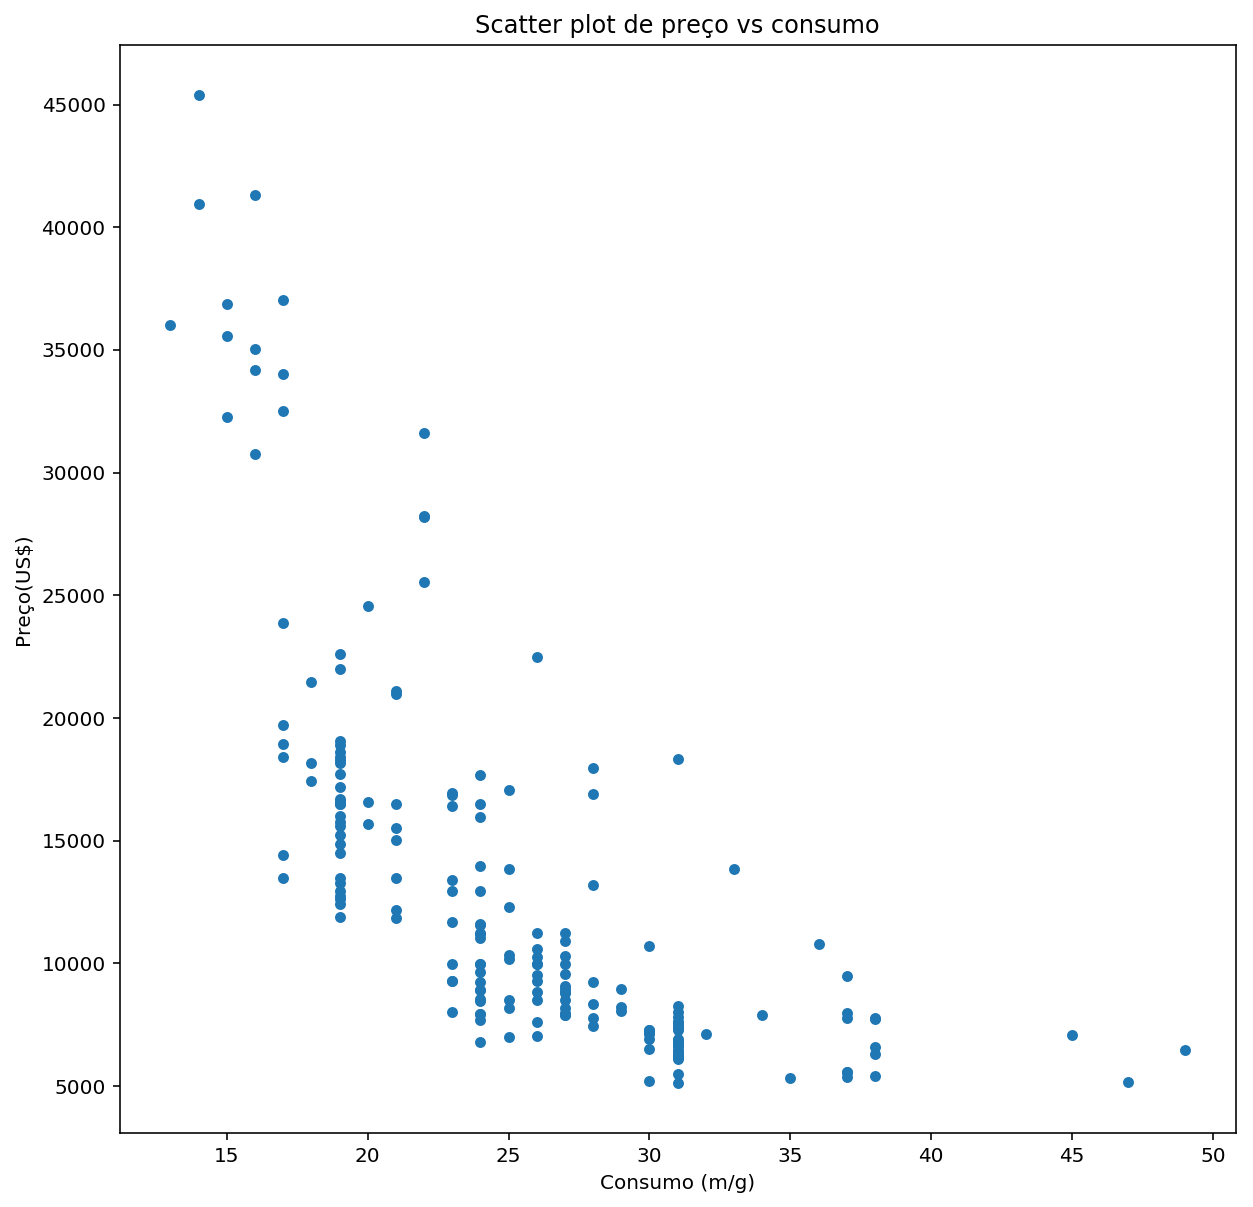

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis                   
auto_prices.plot(kind = 'scatter', x = 'city-mpg', y = 'price', ax = ax)
ax.set_title('Scatter plot de preço vs consumo') # Give the plot a main title
ax.set_xlabel('Consumo (m/g)') # Set text for the x axis
ax.set_ylabel('Preço(US$)')# Set text for y axis

- Na trama acima, podemos ver que os carros mais caros têm a menor eficiência de combustível, enquanto carros relativamente baratos também são mais econômicos para a unidade.

**b) Gráfico em Linha**
- Os gráficos de linhas são semelhantes aos gráficos de pontos. Em traçados de linha os pontos discretos são conectados por linhas.
- Primeiro, vamos criar um dataframe, com uma relação simples entre x e y.

In [25]:
import pandas as pd
x = list(range(100))
y = [z * z for z in range(100)]
df = pd.DataFrame({'x':x, 'y':y})

- Agora aplique a receita anterior para plotar x vs y e gerar um gráfico em linha.

In [26]:
fig = plt.figure(figsize=(10, 10)) # define área do plot 
ax = fig.gca() # define eixo               
df.plot(x = 'x', y = 'y', ax = ax) ## linha é o formato padrão
ax.set_title('Line plot de $x^2$ vs. $x$') # Título Principal
ax.set_xlabel('$x$') # Eixo x
ax.set_ylabel('$x^2$')# Eixo y

**c) Gráfico de Barras**
- Gráficos de barras são usados para exibir as contagens de valores exclusivos de uma variável categórica. A altura da barra representa a contagem para cada categoria única da variável.
- É improvável que o quadro de dados do pandas inclua contagens por categoria de uma variável. Assim, o primeiro passo para fazer um gráfico de barras é calcular as contagens. Felizmente, pandas tem um método ***value_counts***. O código abaixo usa esse método para criar um novo quadro de dados contendo as contagens por marca do carro.

In [27]:
counts = auto_prices['make'].value_counts() # encontre a contagem para cada categoria
counts

toyota           32
nissan           18
mitsubishi       13
mazda            13
honda            13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

- Você pode ver a lista ordenada de contagens descrita acima. Observe que esse quadro de dados é muito menor do que o original, uma vez que só precisa de uma linha para cada valor exclusivo da marca.
- Agora, faça o gráfico de barras usando o quadro de dados de contagens, crie o gráfico de barras do número de carros por marca. Observe que a receita para este gráfico é a mesma que usamos para gráficos de dispersão e gráficos de linha, usando apenas o método .plot.bar.

In [28]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Modelos por Montadora') # Give the plot a main title
ax.set_xlabel('Montadora') # Set text for the x axis
ax.set_ylabel('Modelos')# Set text for y axis

- O gráfico de barra mostra claramente quais fabricantes de automóveis têm o maior número de modelos. As marcas mais especializadas têm relativamente menos modelos.

### Exercício1
- A “classificação” de uma palavra é a sua posição em uma lista de palavras classificadas por frequência: a palavra mais comum tem a classificação 1, a segunda mais comum é 2 etc.
- A lei de Zipf descreve a relação entre classificações e frequências das palavras em linguagens naturais (http://en.wikipedia.org/wiki/Zipf’s_law). Ela prevê especificamente que a frequência, $f$, da palavra com classificação $ r $ é:

  $$ f = cr−s $$ 
- onde s e c são parâmetros que dependem do idioma e do texto. Se você tomar o logaritmo de ambos os lados desta equação, obtemos:

  $$\log f = \log c − s\log r$$
  
- Se você traçar o log de f contra o log de r, terá uma linha reta com uma elevação -s e interceptar o log de c.


**- Escreva um programa que leia um texto em um arquivo, conte as frequências das palavras e exiba uma linha para cada palavra, em ordem descendente da frequência, com log de f e log de r. Use o programa gráfico de sua escolha para traçar os resultados e verifique se formam uma linha reta. Você pode estimar o valor de s?**

### Exercício 2
###### Agora que você já viu como criar alguns plots  simples, é sua vez de realizar uma visualização. Crie o seguinte gráfico de dispersão:

- Traçar o tamanho do motor contra o preço.
- Defina o tamanho da figura como 8 x 8.
- Forneça um título significativo, rótulo do eixo x e rótulo do eixo y.

### Exercício 3
- Faça um gráfico de Barras com os dados contidos no DataFrame do exercício dos epsódios do Pokemon. Represente o número de episódios para cada Temporada. Neste exercicio o gráfico deve conter legenda, titulo, nome dos eixos e cada barra deve conter uma cor diferente.